# 1) Get some training data

In [66]:
from nltk.corpus import brown
from nltk import download
download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [72]:
len(brown.sents())

57340

In [118]:
def prepare_data():
  for tokens in brown.sents()[:100]:
    for index in range(1,len(tokens)):
      yield tokens[:index],tokens[index]

In [119]:
x, y = zip(*prepare_data())

In [120]:
x[3]

['The', 'Fulton', 'County', 'Grand']

In [121]:
y[3]

'Jury'

# 2) Encode the data using FFast

In [5]:
!pip install -U ffast

In [6]:
from ffast import load

In [11]:
tokeniser = load("poincare")

In [122]:
x_train = list(map(lambda tokens:tokeniser.encode(' '.join(tokens)).vector,x))
y_train = list(map(lambda token:tokeniser.encode(token).ids[0], y))

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


# 3) Tran a model

In [123]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(
    hidden_layer_sizes=(100,100,100,100,100), 
    solver='sgd',
    learning_rate='adaptive',
    max_iter=1000,
    verbose=True
)

In [124]:
classifier.fit(x_train, y_train)

Iteration 1, loss = 6.69838307
Iteration 2, loss = 6.44641106
Iteration 3, loss = 6.25441602
Iteration 4, loss = 6.11376073
Iteration 5, loss = 5.99208247
Iteration 6, loss = 5.88514483
Iteration 7, loss = 5.80194387
Iteration 8, loss = 5.73731535
Iteration 9, loss = 5.68580632
Iteration 10, loss = 5.64352334
Iteration 11, loss = 5.60996077
Iteration 12, loss = 5.58421566
Iteration 13, loss = 5.55933605
Iteration 14, loss = 5.53968250
Iteration 15, loss = 5.52318617
Iteration 16, loss = 5.51001203
Iteration 17, loss = 5.49646448
Iteration 18, loss = 5.48449484
Iteration 19, loss = 5.47385182
Iteration 20, loss = 5.46664444
Iteration 21, loss = 5.45693058
Iteration 22, loss = 5.45146670
Iteration 23, loss = 5.44054439
Iteration 24, loss = 5.43437521
Iteration 25, loss = 5.42846690
Iteration 26, loss = 5.41912540
Iteration 27, loss = 5.41328942
Iteration 28, loss = 5.40817712
Iteration 29, loss = 5.40321155
Iteration 30, loss = 5.39775449
Iteration 31, loss = 5.39093516
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100, 100),
              learning_rate='adaptive', max_iter=1000, solver='sgd',
              verbose=True)

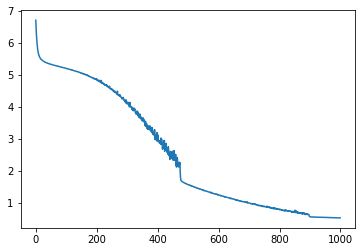

In [131]:
from matplotlib.pyplot import plot
plot(classifier.loss_curve_)

# 4) Use the trained model to generate text

In [128]:
predict_next_id = lambda id_sequence: classifier.predict([tokeniser.decode(id_sequence).vector])

In [126]:
from numpy import concatenate, array

In [133]:
def generate(prompt:str) -> str:
  sequence = tokeniser.encode(prompt).ids
  for _ in range(10):
    sequence = concatenate([sequence,predict_next_id(sequence)])
  return str(tokeniser.decode(sequence))

In [135]:
generate("the jury")

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))
/usr/local/lib/python3.7/dist-packages/scipy/stats/s

'the jury said it found that county <Unknown> committee for and <Unknown>'

# 5) Save the trained model

In [132]:
from joblib import dump, load
PATH = "language_model.joblib.pkl"
dump(classifier, PATH, compress=9)

['language_model.joblib.pkl']